# Possum vs opossum image classifier
In this notebook I build an image classifier using transfer learning that can distinguish between images of Australian brushtail possums (https://en.wikipedia.org/wiki/Common_brushtail_possum) and American Virginia opossums (https://en.wikipedia.org/wiki/Virginia_opossum). The architecture is a convolutional neural network, specifically a ResNet-18. The classifier is pre-trained on ImageNet (for details see here: https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py)

---
## Set up 

In [1]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

---
## Data loading

In [2]:
# specify path
marsupial_types = ('brushtail','opossum')
path = Path('marsupials')

In [3]:
# create object of type DataBlock
marsupials = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # ImageBlock: independent variable (data; here: images); CategoryBlock: dependent variables (labels; here: categories)
    get_items=get_image_files, # which function to use to get a list of items
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label, # function for labeling the data
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # choose random crop and resize to 224 * 224 pixels
    batch_tfms=aug_transforms()) # data augmentation (only applied to training set)

In [4]:
# call DataLoaders (includes training and validation DataLoader)
dls = marsupials.dataloaders(path)

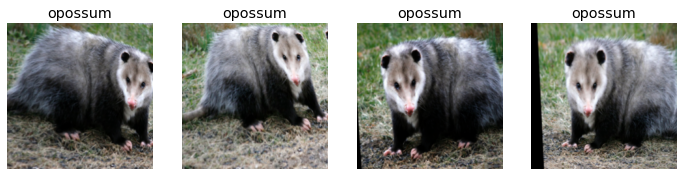

In [5]:
# inspect training data
dls.train.show_batch(max_n=4, nrows=1, unique=True)

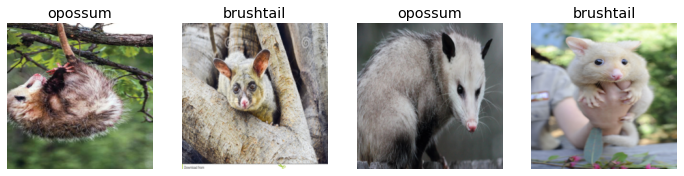

In [6]:
# inspect validation data
dls.valid.show_batch(max_n=4, nrows=1)

---
## Model training

In [7]:
# train model using a ResNet-18 architecture
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10) # fine_tune is used for transfer learning; the number refers to the number of epochs

# note: in fastai, when doing transfer learning, one epoch is used to fit just those parts of the model necessary
# to get the new random head to work correctly with your dataset; the following epochs are used to fit the entire
# model, updating the weights of later layers (especially the head) faster than the earlier layers (which 
# generally don't require many changes from the pretrained weights).

epoch,train_loss,valid_loss,error_rate,time
0,1.198750,0.204963,0.083333,00:09


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.237007,0.076227,0.035714,00:07
1,0.191821,0.044222,0.011905,00:07
2,0.138257,0.034047,0.011905,00:07
3,0.105052,0.014721,0.011905,00:07
4,0.092974,0.005610,0.000000,00:08
5,0.078524,0.004040,0.000000,00:07
6,0.073381,0.004011,0.000000,00:07
7,0.064888,0.004459,0.000000,00:07
8,0.058081,0.003245,0.000000,00:06
9,0.051475,0.002729,0.000000,00:07


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency e

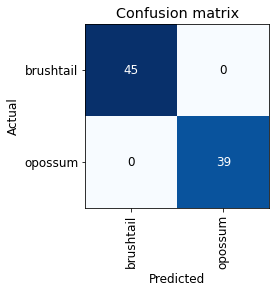

In [8]:
# visualise number of misclassified images in validation set with confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

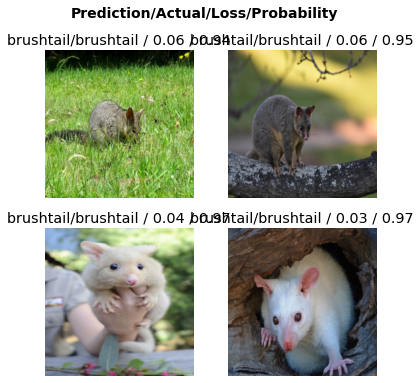

In [9]:
# sort images by loss
interp.plot_top_losses(4, nrows=2)

---
## Saving the model

In [10]:
learn.export() # creates a file called "export.pkl"